In [32]:
#converting coco dataset to masks

In [1]:
import os



#path to final dataset
path = "/home/madmax/Documents/SK_articles/to_git/final_dataset/"

#os.mkdir(path + "/new") 

In [2]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

In [3]:
dataDir='/home/madmax/Documents/SK_articles/to_git/all_car_data/coco_dataset_1/'
dataType=''
annFile='{}annotations/instances{}.json'.format(dataDir,dataType)

In [4]:
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!


In [5]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
_background_ back_bumper back_glass back_left_door left_back_turn_light front_left_turn_light front_right_turn_light right_back_turn_light trunk wheel back_right_door back_right_light front_bumper front_glass front_left_door front_left_light front_right_door back_left_light tailgate front_right_light hood left_mirror right_mirror

COCO supercategories: 
_background_ back_bumper back_glass front_left_turn_light front_bumper left_back_turn_light right_back_turn_light front_right_light trunk hood wheel front_left_light tailgate back_right_door front_left_door front_glass back_left_light left_mirror front_right_turn_light back_right_light front_right_door right_mirror back_left_door


In [6]:
#back_left_light back_right_light front_left_light front_right_light 
catIds = coco.getCatIds(catNms=['back_left_light'])
imgIds = coco.getImgIds(catIds=catIds)
print(imgIds)
img = coco.loadImgs(imgIds[0])[0]

[295282688, 295282690, 295282692, 295282693, 295282694, 295282695, 295282697, 295282698, 295282700, 295282701, 295282705, 295282706, 295282708, 295282709, 295282710, 295282712, 295282713, 295282714, 295282720, 295282722, 295282723, 295282725, 295282729, 295282730, 295282732, 295282733, 295282735, 295282737, 295282739, 295282742, 295282743, 295282744, 295282747, 295282748, 295282753, 295282757, 295282758, 295282759, 295282760, 295282762, 295282763, 295282764, 295282765, 295282766, 295282768, 295282773, 295282775, 295282782, 295282784, 295282785, 295282788, 295282790, 295282792, 295282795, 295282796, 295282799, 295282801, 295282804, 295282806, 295282809, 295282810, 295282812, 295282813, 295282817, 295282820, 295282823, 295282826, 295282830, 295282831, 295282832, 295282834, 295282835, 295282836, 295282838, 295282843, 295282846, 295282849, 295282850, 295282851, 295282859, 295282860, 295282861, 295282862, 295282863, 295282865, 295282866, 295282870, 295282874, 295282877, 295282878, 295282882

In [7]:
def make_img_dirs_and_masks(class_name, dataset, path):
    catIds = dataset.getCatIds(catNms=[class_name])
    imgIds = dataset.getImgIds(catIds=catIds)
    annIds = dataset.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns = dataset.loadAnns(annIds)
    for i in range (len(imgIds)):
      #print(catIds)
      try:
        os.mkdir(path + str(imgIds[i]))
      except:
        pass
      img_buf = dataset.loadImgs(imgIds[i])[0]
      #os.mkdir(path+str(img['id'])+'/'+label)
      I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img_buf['file_name']))
      io.imsave(path+str(img_buf['id'])+'/' + "original.png", I)
      try:
        io.imsave("/home/madmax/Documents/SK_articles/to_git/tester/"+img_buf['file_name'], I)
      except:
        pass
      os.mkdir(path + str(img_buf['id'])+'/' + class_name)     
      annIds = coco.getAnnIds(imgIds=img_buf['id'], catIds=catIds, iscrowd=None)
      anns = coco.loadAnns(annIds)
      mask = dataset.annToMask(anns[0])
      io.imsave(path+str(img_buf['id'])+'/' + class_name + '/' + "0.png", mask)
   

In [10]:
import warnings
warnings.filterwarnings("ignore")
make_img_dirs_and_masks("back_left_light",coco, path)
make_img_dirs_and_masks("back_right_light",coco, path)
make_img_dirs_and_masks("front_right_light",coco, path)
make_img_dirs_and_masks("front_left_light",coco, path)
print("OK")

OK


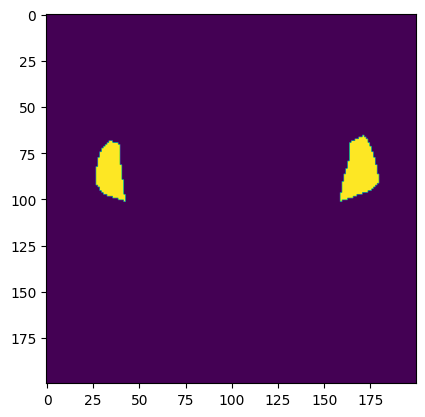

In [11]:
#checking
I = io.imread("final_dataset/295279771/front_left_light/0.png")
I2= io.imread("final_dataset/295279771/front_right_light/0.png")
plt.imshow(I+I2)
plt.show()

In [57]:
#if we want to check 
import os
arr = os.listdir('tester')
arr2 = os.listdir('all_car_data/coco_dataset_1/images')

In [63]:
def remove_common(a, b):
 
    for i in a[:]:
        if i in b:
            a.remove(i)
            b.remove(i)
            
remove_common(arr, arr2)           
arr2

['train129.jpg',
 'train369.jpg',
 'train220.jpg',
 'train86.jpg',
 'train197.jpg',
 'train196.jpg',
 '710image.png']